# The double pendulum

This project's aim is to simulate numerically, via python, the chaotic movement of an idealized double pendulum system in two dimensions. We will then try to understand by analysing the behaviour of the solution why this system is called "chaotic" and how chaotic it is exactly.

## Mathematical model

We can solve mathematically the sytsem thanks to **Lagrangian mechanics**.

The two Euler-Lagrange equations describing our double pendulum system can be written as:
![](https://cdn.mathpix.com/snip/images/xe5-1RyRdUATEZ979-rMRoioUArNI7J7mIcsYcjPGl8.original.fullsize.png)

Uncoupling these second-order equations gives four first-order equations:

![](https://cdn.mathpix.com/snip/images/it9kQao_ZEdmdSE8DpMiH3ni6_8-1KanNTeH0ADr0N8.original.fullsize.png)



## Numerical scheme

We have four ordinary differential equations, all of the first order, that we will analyze numerically via the **finite differences method**.

In this particular case, we will choose the ***Runge-Kutta 4*** scheme.

Normally, we would want to use a symplectic scheme that is able to conserve the value of the total energy of the system. But the error created by a non-symplectic scheme is not significant enough for small timescales used to study a typical double pendulum. 
RK4 

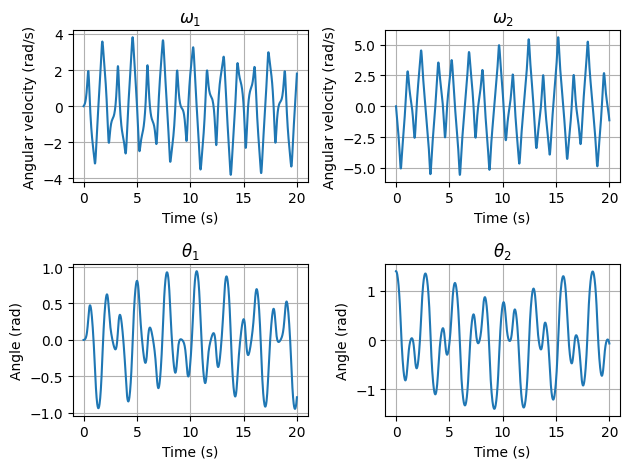

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m1 = 1
m2 = 1
l1 = 1
l2 = 1
g = 9.81

# Time parameters
t_max = 20
h = 0.02 # Timestep size matters !!

# Initial conditions
w1_0 = 0
w2_0 = 0
th1_0 = 0 # 1.4 rad is approximately 80 degrees
th2_0 = 1.4

u0 = np.array([w1_0, w2_0, th1_0, th2_0])

def F_deriv(w1, w2, th1, th2):
    """ Derivatives of the u array """
    num1 = -g*(2*m1+m2)*np.sin(th1)-m2*g*np.sin(th1-2*th2)-2*np.sin(th1-th2)*m2*(w2**2*l2+w1**2*l1*np.cos(th1-th2))
    denom1 = l1*(2*m1+m2-m2*np.cos(2*th1-2*th2))
    
    num2 = 2*np.sin(th1-th2)*(w1**2*l1*(m1+m2)+g*(m1+m2)*np.cos(th1)+w2**2*l2*m2*np.cos(th1-th2))
    denom2 = l2*(2*m1+m2-m2*np.cos(2*th1-2*th2))
    
    w1_dot = num1/denom1
    w2_dot = num2/denom2    
    
    return np.array([w1_dot, w2_dot, w1, w2])
    
    
def solve_RK4(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros((N,4))
    u[0] = u0
    for i in range(N - 1):
        k1 = h * f(u[i][0], u[i][1], u[i][2], u[i][3])
        k2 = h * f(u[i][0] + k1[0]/2, u[i][1] + k1[1]/2, u[i][2] + k1[2]/2, u[i][3] + k1[3]/2)
        k3 = h * f(u[i][0] + k2[0]/2, u[i][1] + k2[1]/2, u[i][2] + k2[2]/2, u[i][3] + k2[3]/2)
        k4 = h * f(u[i][0] + k3[0], u[i][1] + k3[1], u[i][2] + k3[2], u[i][3] + k3[3])
        u[i+1] = u[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, u

t1, u1 = solve_RK4(F_deriv, u0, h, t_max)

th1 = u1[:,2] 
th2 = u1[:,3]
w1 = u1[:,0]
w2 = u1[:,1]

# Plot the results
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(t1, w1)
ax[0, 0].set_xlabel("Time (s)")
ax[0, 0].set_ylabel("Angular velocity (rad/s)")
ax[0, 0].set_title(r"$\omega_1$")
ax[0, 0].grid()
    
ax[0, 1].plot(t1, w2)
ax[0, 1].set_xlabel("Time (s)")
ax[0, 1].set_ylabel("Angular velocity (rad/s)")
ax[0, 1].set_title(r"$\omega_2$")
ax[0, 1].grid()
    
ax[1, 0].plot(t1, th1)
ax[1, 0].set_xlabel("Time (s)")
ax[1, 0].set_ylabel("Angle (rad)")
ax[1, 0].set_title(r"$\theta_1$")
ax[1, 0].grid()
    
ax[1, 1].plot(t1, th2)
ax[1, 1].set_xlabel("Time (s)")
ax[1, 1].set_ylabel("Angle (rad)")
ax[1, 1].set_title(r"$\theta_2$")
ax[1, 1].grid()

plt.tight_layout()
# fig.savefig("angles_and_velocities.png")

plt.show()



## Visualization of the system

One way to visualize the system is to plot the paths followed by each masses of the pendulum.
We can see in the plot below that, while the m1 mass is bounded in a circle (caution: the x and  axes are not of the same scale), the m2 mass is following a seemingly random path.

We will see later that, except for certain initial conditions, the double pendulum system is in fact **chaotic**.


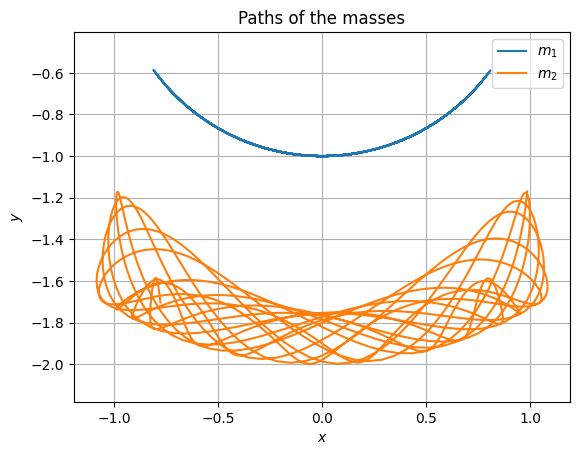

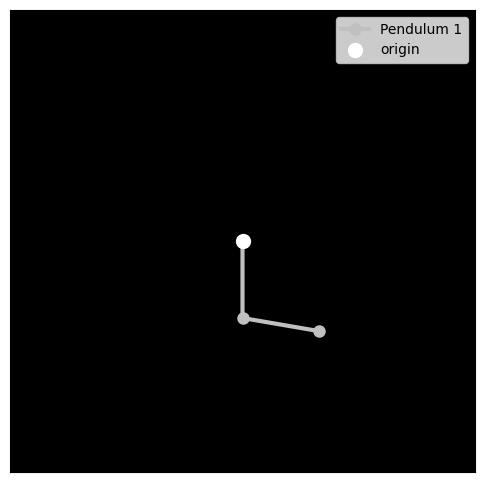

In [18]:
import matplotlib.animation as animation

N = int(np.floor(t_max / h)) + 1 # Number of steps

### Position in cartesian coordinates

x1 = np.zeros(N) # x component of m1
y1 = np.zeros(N) # y component of m1

x2 = np.zeros(N) # x component of m2
y2 = np.zeros(N) # y component of m2

for i in range(N):
    x1[i] = l1*np.sin(th1[i])
    y1[i] = -l1*np.cos(th1[i])
    
    x2[i] = x1[i] + l2*np.sin(th2[i])
    y2[i] = y1[i] - l2*np.cos(th2[i])

plt.figure()
plt.plot(x1, y1, label=r"$m_1$")
plt.plot(x2, y2, label=r"$m_2$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Paths of the masses")
plt.axis("equal")
plt.grid()
plt.legend()
#plt.savefig("one_XY_path.png")

plt.show()

# Animation
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1,1, figsize=(3*(l1+l2),3*(l1+l2)))

ax.set_facecolor('k')
ax.set_ylim(-1.5*(l1+l2),1.5*(l1+l2))
ax.set_xlim(-1.5*(l1+l2),1.5*(l1+l2))
ax.get_xaxis().set_ticks([])    
ax.get_yaxis().set_ticks([])

ln1, = ax.plot([], [], 'o-', lw=3, markersize=8, color = "silver", label = "Pendulum 1")
ax.plot(0,0,'o', color = "white", markersize=10, label = "origin")
ax.legend()
ani = animation.FuncAnimation(fig, animate, frames=len(t1), interval=50)
ani.save('one_pendulum.gif', writer='pillow', fps=1/h)

## Energy of the system

The energy of the system for any time can be easily calculated and plotted.

We can see in the plot shown below that, the Runge-Kutta 4 method not being a symplectic one, there is, after 20 seconds, a 1% loss of total energy in the system, which is not too problematic for our case.

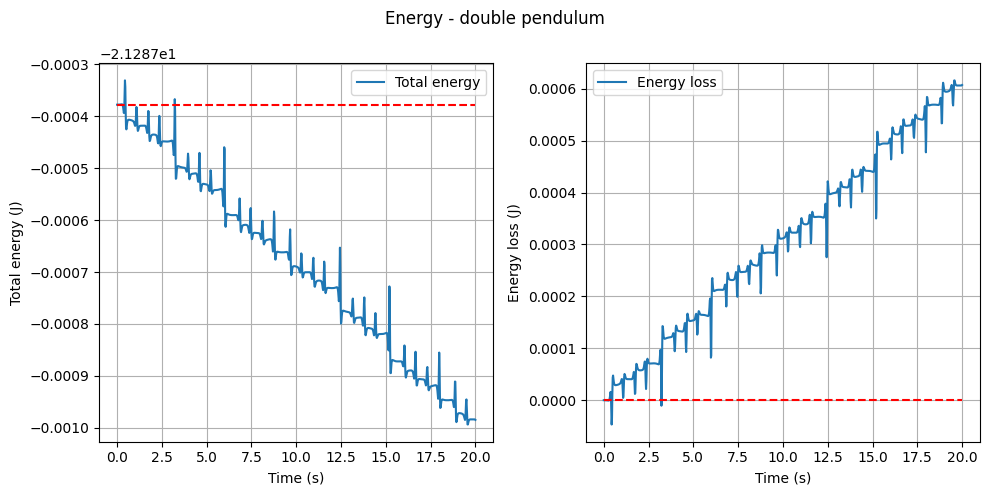

In [19]:
### Energy calculations

T = np.zeros(N) # kinetic energy
V = np.zeros(N) # potential energy
E = np.zeros(N) # total energy

for i in range(N):
    T[i] = 0.5*m1*l1**2*w1[i]**2 + 0.5*m2*(l1**2*w1[i]**2 + l2**2*w2[i]**2 + 2*l1*l2*w1[i]*w2[i]*np.cos(th1[i]-th2[i])) 
    V[i] = -(m1 + m2)*g*l1*np.cos(th1[i]) - m2*g*l2*np.cos(th2[i])
    E[i] = T[i] + V[i]


fig, ax = plt.subplots(1,2, figsize=(10,5))

fig.suptitle("Energy - double pendulum")
ax[0].plot(t1, E) # total energy vs time
ax[0].plot(t1, E[0]*np.ones(N), "--", color = "red") # initial energy
ax[0].legend(["Total energy"])
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Total energy (J)")
ax[0].grid()
#fig.savefig("one_energy_loss.png")


ax[1].plot(t1, E[0] - E) # energy loss vs time
ax[1].plot(t1, np.zeros(N), "--", color = "red") # zero line
ax[1].legend(["Energy loss"])
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Energy loss (J)")
ax[1].grid() 

plt.tight_layout()
plt.show()

## Spin-up

## Chaos and Lyapunov exponents

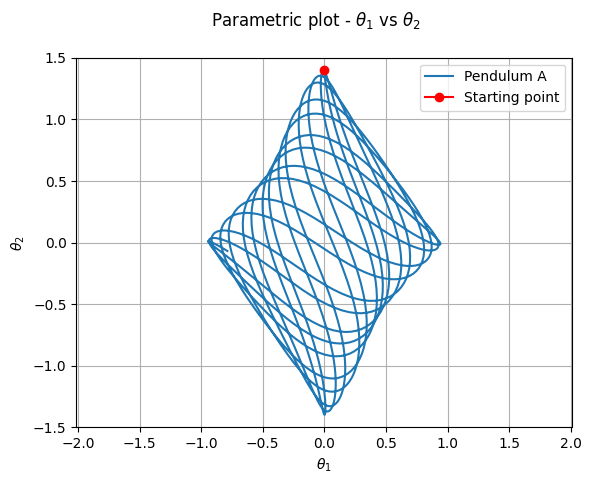

In [34]:
### Brownian motion plot
plt.figure()

plt.plot(th1, th2)
plt.suptitle(r"Parametric plot - $\theta_1$ vs $\theta_2$")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")

plt.axis("equal")
plt.grid()
plt.plot(th1[0],th2[0],"-o", color = "red")
plt.legend(["Pendulum A", "Starting point"])
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.savefig("one_brownian_motion.png")

plt.show()